# Imports

In [1]:
import pandas as pd
import pandasql as ps
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Get Data

In [2]:
# Get currency pair values
df = pd.read_csv(
    filepath_or_buffer="/kaggle/input/ibm-unsupervised-learning-eda-and-data-cleaning/data.csv",
    index_col='Date',
    parse_dates=['Date']
)

In [3]:
# Get equal weight output
ew_output = pd.read_csv(
    filepath_or_buffer="/kaggle/input/ibm-unsupervised-learning-equal-weight/data.csv",
    parse_dates=['Start', 'End']
)
ew_output.drop('Unnamed: 0', axis=1, inplace=True)

# Get min-variance output
mv_output = pd.read_csv(
    filepath_or_buffer="/kaggle/input/ibm-unsupervised-learning-minimum-variance/data.csv",
    parse_dates=['Start', 'End']
)
mv_output.drop('Unnamed: 0', axis=1, inplace=True)

# Get risk-parity output
rp_output = pd.read_csv(
    filepath_or_buffer="/kaggle/input/ibm-unsupervised-learning-risk-parity/data.csv",
    parse_dates=['Start', 'End']
)
rp_output.drop('Unnamed: 0', axis=1, inplace=True)

# Get HRP ward linkage output
hrp_ward_output = pd.read_csv(
    filepath_or_buffer="/kaggle/input/ibm-unsupervised-learning-hrp/ward_data.csv",
    parse_dates=['Start', 'End']
)
hrp_ward_output.drop('Unnamed: 0', axis=1, inplace=True)

# Get HRP nearest point linkage output
hrp_nearest_point_output = pd.read_csv(
    filepath_or_buffer="/kaggle/input/ibm-unsupervised-learning-hrp/nearest_point_data.csv",
    parse_dates=['Start', 'End']
)
hrp_nearest_point_output.drop('Unnamed: 0', axis=1, inplace=True)

# Get HRP average linkage output
hrp_average_output = pd.read_csv(
    filepath_or_buffer="/kaggle/input/ibm-unsupervised-learning-hrp/average_data.csv",
    parse_dates=['Start', 'End']
)
hrp_average_output.drop('Unnamed: 0', axis=1, inplace=True)

# Select best HRP output
hrp_output = hrp_ward_output.copy()

# Helper Functions for Plots

In [4]:
def plot_strategy_comparison(
    data: dict,
    title: str,
    xlabel: str,
    ylabel: str,
    figsize: tuple
) -> None:   
    """
    Function to plot series of various strategies on the same plot.
    
    PARAMS:
    'data': Dictionary where keys are the name of the strategy and values are pandas series.
            These series must all have the same datetime index. The dictionary keys will be used in the legend
    'title': Title for plot,
    'xlabel': x axis label,
    'ylabel': y axis label,
    'figsize': Size of figure (width, height)
    """
    
    # Create dataframe from dict
    df = pd.DataFrame(
        data=data
    )
    
    # Build plot
    ax = df.plot(figsize=figsize)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Show plot
    plt.show()

In [5]:
def plot_bar(
    data: dict,
    title: str,
    xlabel: str,
    ylabel: str,
    figsize: tuple
) -> None:   
    """
    Function to plot cumulative returns of various strategies on the same plot.
    
    PARAMS:
    'data': Dictionary where keys are the name of the strategy and values are singular floats. Each key will be a bar with the value as the height of the bar
    'title': Title for plot,
    'xlabel': x axis label,
    'ylabel': y axis label,
    'figsize': Size of figure (width, height)
    """
    # Set up subplots
    fig, ax = plt.subplots(figsize=figsize)
    
    # Plot bar
    bars = ax.bar(data.keys(), data.values())
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
    # Show plot
    plt.show()

# Allocations

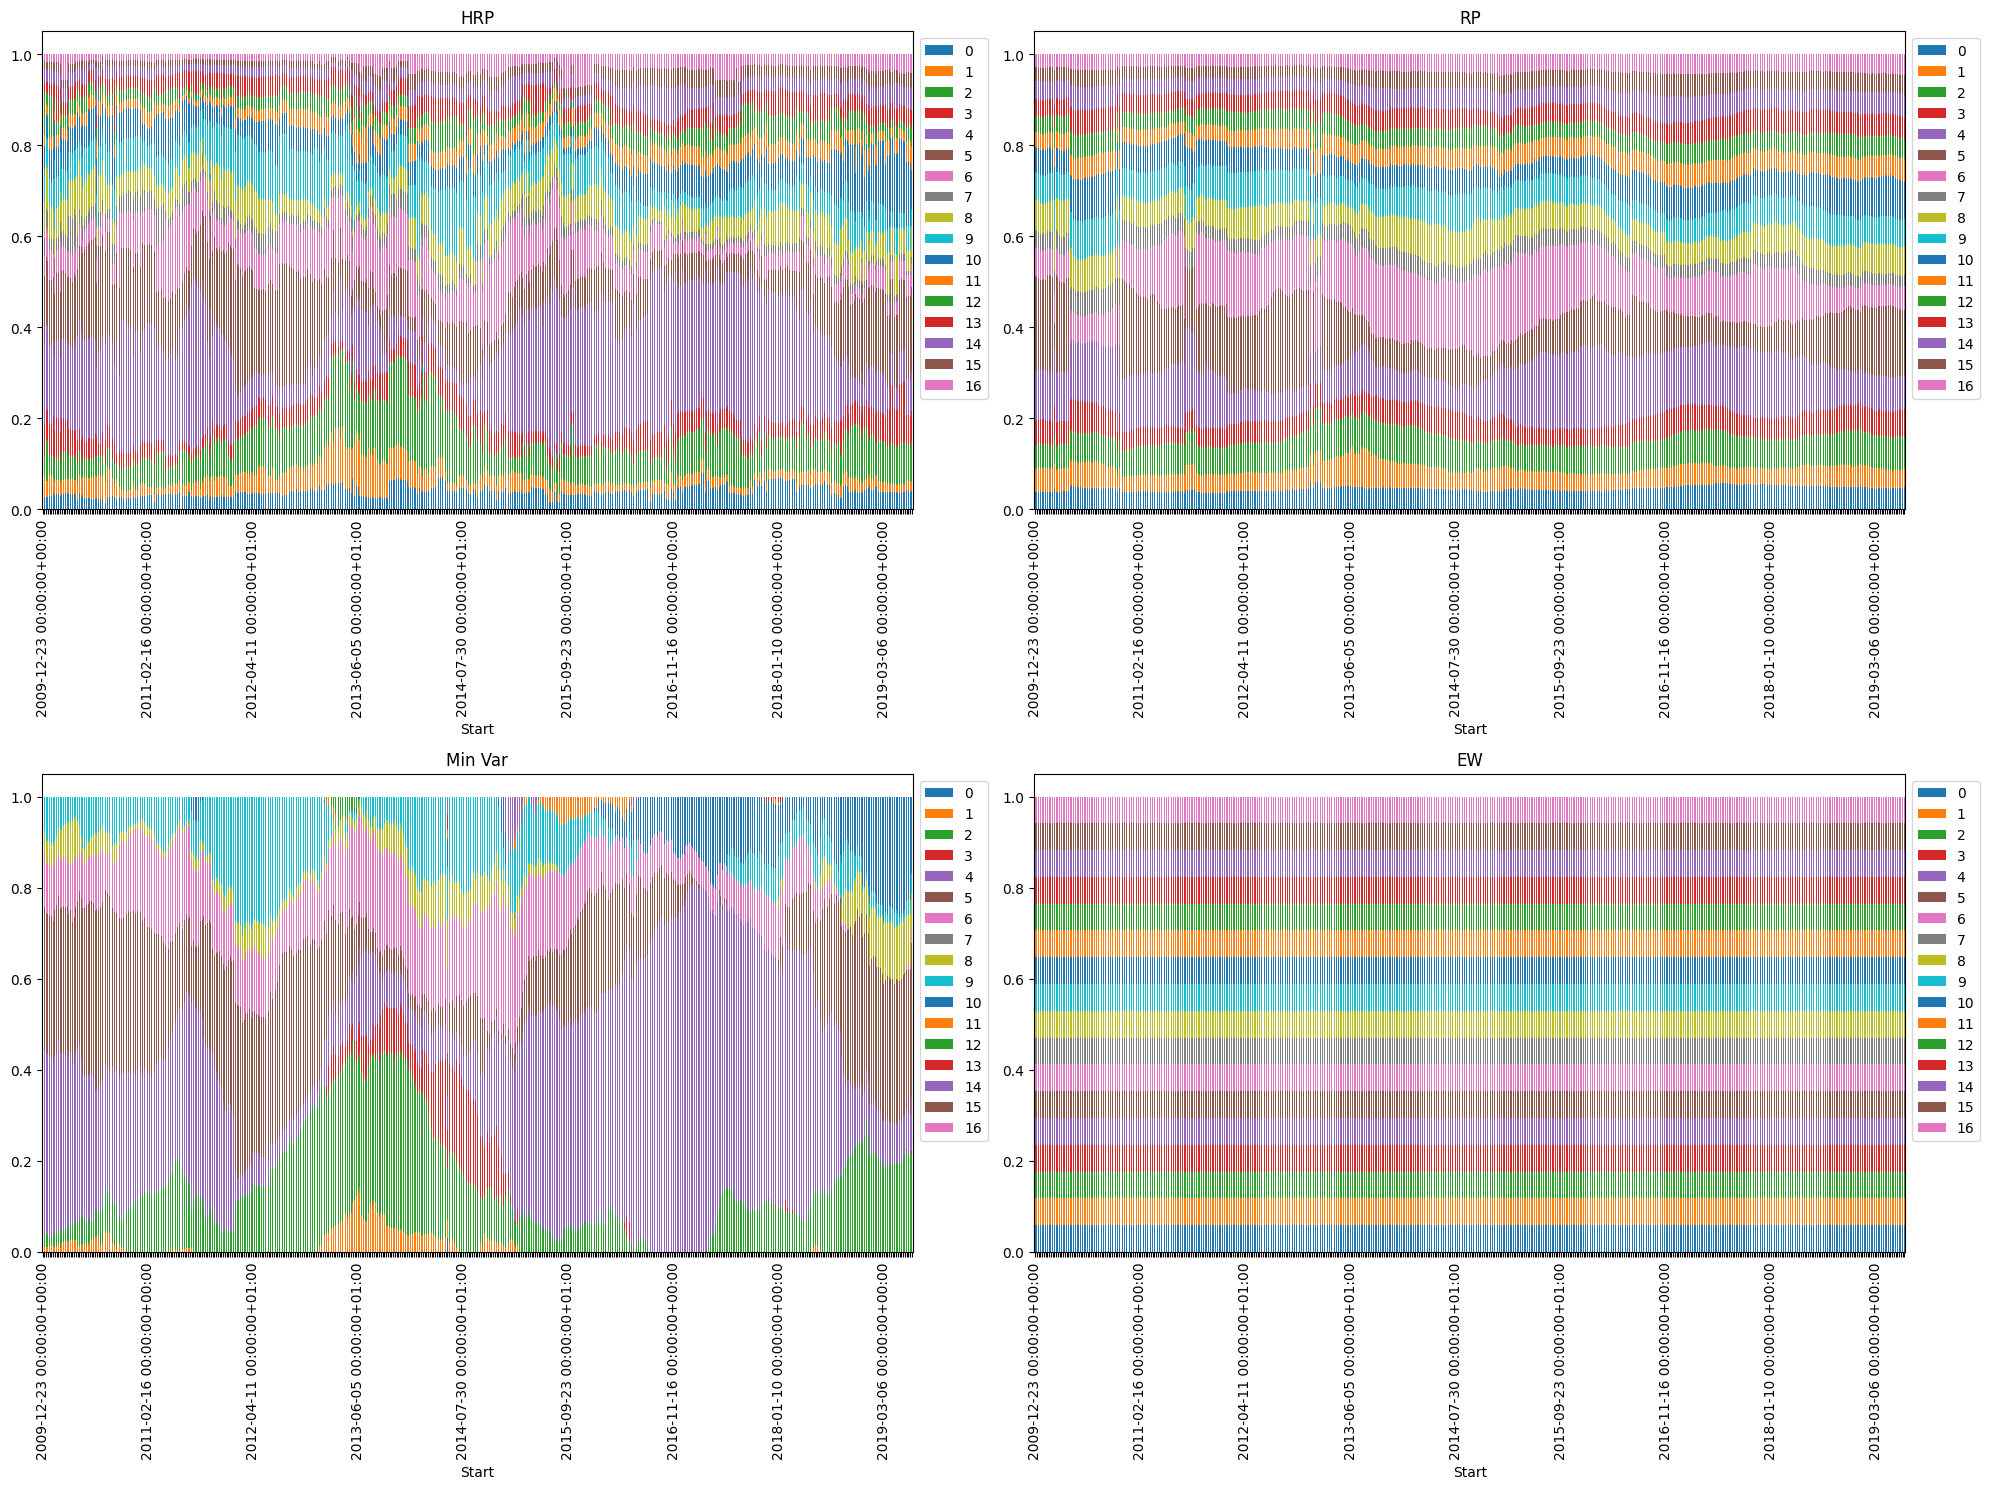

In [6]:
# Plot weights over time for each strat
dfs = [hrp_output, rp_output, mv_output, ew_output]
titles = ['HRP', 'RP', 'Min Var', 'EW']
fig, axs = plt.subplots(2, 2, figsize=(20, 15))
for ax, frame, title in zip(axs.flatten(), dfs, titles):
    frame.pivot(columns='Asset', index='Start', values='Weight').plot.bar(stacked=True, ax=ax)
    ax.set_title(title)
    ax.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
    labels = ax.get_xticklabels()
    for i, label in enumerate(labels):
        if i % 60 != 0:
            label.set_visible(False)
plt.tight_layout()
plt.show()

# Returns

In [7]:
# Calculate spot returns
returns = df.pct_change().dropna()

# Replace currency pair name with asset number
returns.columns = range(returns.shape[1])

In [8]:
returns

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
Date,,,,,,,,,,,,,,,,,
2009-01-05 00:00:00+00:00,-0.006951,-0.041721,-0.017695,0.020300,-0.000332,0.015546,-0.025227,-0.001476,-0.011115,-0.013057,0.027338,0.018698,0.007989,-0.005624,0.001086,0.023483,0.009329
2009-01-06 00:00:00+00:00,-0.008429,-0.034965,-0.003283,0.010057,0.005723,0.001749,-0.005399,0.008439,-0.002600,-0.013141,0.007036,-0.000191,0.007319,-0.012901,-0.008495,0.003892,-0.019386
2009-01-07 00:00:00+00:00,0.014191,0.015662,0.010219,-0.007417,0.000948,-0.007496,0.005990,0.028348,-0.002607,-0.011080,-0.011286,0.000026,-0.008155,0.013428,0.002135,0.004795,0.002382
2009-01-08 00:00:00+00:00,-0.002415,0.019379,-0.012540,-0.006424,-0.003831,-0.014243,0.017119,0.003705,0.022598,-0.009711,-0.008878,-0.008217,0.010563,-0.009717,-0.006367,0.012084,-0.002410
2009-01-09 00:00:00+00:00,0.007334,0.012869,0.008720,0.018137,0.002130,-0.010836,0.003220,0.015034,0.016010,0.003152,0.018282,0.017919,-0.000972,0.004698,0.030495,0.026788,0.013713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-06-24 00:00:00+01:00,-0.003157,-0.004482,0.001312,-0.007828,-0.003011,0.000326,0.005802,-0.001369,0.000951,-0.003368,-0.005759,-0.006956,-0.006791,-0.001936,-0.007273,-0.004443,-0.007678
2019-06-25 00:00:00+01:00,-0.003069,0.001335,-0.001470,-0.001366,0.000469,0.000140,0.005018,0.002733,-0.005042,0.000880,-0.003691,-0.006745,-0.001430,-0.004018,-0.002978,-0.003268,-0.001673
2019-06-26 00:00:00+01:00,0.000550,0.005202,-0.000197,0.002668,0.000503,-0.001500,0.001203,-0.001965,0.002811,0.003860,0.003108,0.000710,0.007294,-0.001404,-0.002031,0.001812,0.003620


In [9]:
def calculate_strategy_returns(
    returns: pd.DataFrame,
    strategy_output: pd.DataFrame
) -> pd.DataFrame:
    """
    Function to calculate returns of a particular strategy
    
    PARAMS: 
    'returns': Dataframe with daily returns of each currency pair
    'strategy_output': Dataframe showing thw weights outputted by each strategy over time
    """
    
    # Unpivot daily returns dataframe to make calculations more simple
    df = returns.reset_index().melt(
        id_vars=['Date'],
        var_name='Asset',
        value_name='Return'
    )
    
    # Join the strategy output onto the returns
    query = '''
        SELECT
            df.Date,
            df.Asset,
            df.Return,
            so.Weight
        FROM df
        INNER JOIN strategy_output so
        ON df.Asset = so.Asset
        AND df.Date BETWEEN so.Start AND so.End
    '''
    df = ps.sqldf(query,locals())
    
    # Calculate return of strategy at each date
    df['Return Contribution'] = df['Return'] * df['Weight']
    df = df.groupby('Date')['Return Contribution'].sum()
    
    # Ensure datetime index
    df.index = pd.to_datetime(df.index)
    
    return df

In [10]:
def calculate_strategy_cumulative_returns(
    returns: pd.DataFrame,
    strategy_output: pd.DataFrame
) -> pd.Series:
    """
    Function to calculate cumulative returns of a particular strategy
    
    PARAMS: 
    'returns': Dataframe with daily returns of each currency pair
    'strategy_output': Dataframe showing thw weights outputted by each strategy over time
    """
    # Calculate returns of strategy
    spot_returns = calculate_strategy_returns(
        returns=returns,
        strategy_output=strategy_output
    )
    
    # Calculate cumulative return of strategy at each date
    cum_returns = (1 + spot_returns).cumprod()
    
    return cum_returns

In [11]:
# Get cumulative returns for various strategies
equal_weight_cumulative_returns = calculate_strategy_cumulative_returns(
    returns=returns,
    strategy_output=ew_output
)
min_variance_cumulative_returns = calculate_strategy_cumulative_returns(
    returns=returns,
    strategy_output=mv_output
)
risk_parity_cumulative_returns = calculate_strategy_cumulative_returns(
    returns=returns,
    strategy_output=rp_output
)
hrp_cumulative_returns = calculate_strategy_cumulative_returns(
    returns=returns,
    strategy_output=hrp_output
)

In [12]:
# Create dictionary with cumulative returns for all strategies
cumulative_returns = {
    'HRP': hrp_cumulative_returns,
    'RP': risk_parity_cumulative_returns,
    'Min Var': min_variance_cumulative_returns,
    'EW': equal_weight_cumulative_returns
}

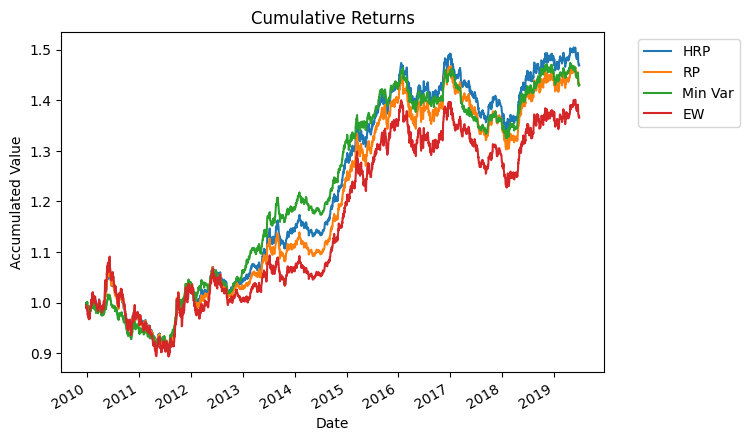

In [13]:
# Plot cumulative returns
plot_strategy_comparison(
    data=cumulative_returns,
    title='Cumulative Returns',
    xlabel='Date',
    ylabel='Accumulated Value',
    figsize=(7, 5)
)

# Volatilities

In [14]:
def calculate_strategy_volatilities(
    strategy_returns: pd.Series,
    lookback: int,
    annualize=True
) -> pd.Series:
    """
    Function to calculate the rolling (annualized) volatility of a strategy for some user-provided lookback period in days
    
    PARAMS: 
    'strategy_returns': Series with daily returns of a strategy (output of calculate_strategy_returns())
    'lookback': Lookback period in days to calculate rolling volatility for
    'annualize': Whether to annualize the vols
    """
    # Calculate rolling volatility
    volatilities = strategy_returns.rolling(
        window=lookback
    ).std()
    
    # Annualize
    if annualize:
        volatilities = volatilities * np.sqrt(252)
        
    return volatilities

In [15]:
# Lookback period in days
lookback = 252

# Get returns for various strategies
equal_weight_returns = calculate_strategy_returns(
    returns=returns,
    strategy_output=ew_output
)
min_variance_returns = calculate_strategy_returns(
    returns=returns,
    strategy_output=mv_output
)
risk_parity_returns = calculate_strategy_returns(
    returns=returns,
    strategy_output=rp_output
)
hrp_returns = calculate_strategy_returns(
    returns=returns,
    strategy_output=hrp_output
)

# Get rolling volatilities for various strategies
equal_weight_volatilities = calculate_strategy_volatilities(
    strategy_returns=equal_weight_returns,
    lookback=lookback,
    annualize=True
)
min_variance_volatilities = calculate_strategy_volatilities(
    strategy_returns=min_variance_returns,
    lookback=lookback,
    annualize=True
)
risk_parity_volatilities = calculate_strategy_volatilities(
    strategy_returns=risk_parity_returns,
    lookback=lookback,
    annualize=True
)
hrp_volatilities = calculate_strategy_volatilities(
    strategy_returns=hrp_returns,
    lookback=lookback,
    annualize=True
)

In [16]:
# Create dictionary with volatilities for all strategies
volatilities = {
    'HRP': hrp_volatilities,
    'RP': risk_parity_volatilities,
    'Min Var': min_variance_volatilities,
    'EW': equal_weight_volatilities
}

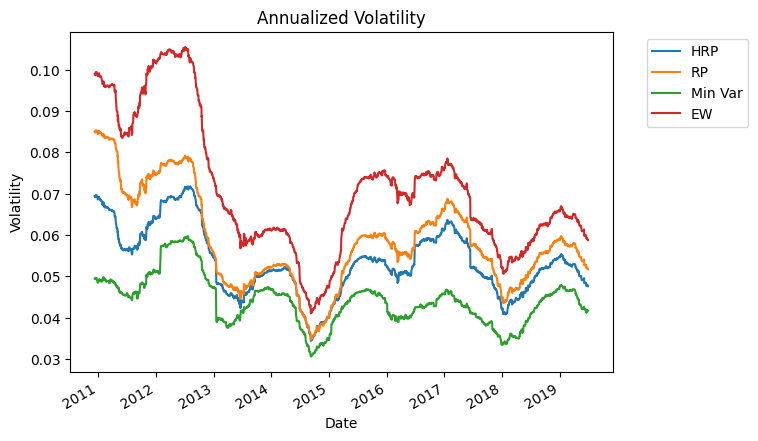

In [17]:
# Plot volatilities
plot_strategy_comparison(
    data=volatilities,
    title='Annualized Volatility',
    xlabel='Date',
    ylabel='Volatility',
    figsize=(7, 5)
)

# Sharpe Ratios

In [18]:
def calculate_strategy_sharpe_ratio(
    strategy_returns: pd.Series
) -> float:
    """
    Function to calculate annualized 'Sharpe Ratio' of a strategy over the whole time period (we ignore the subraction of the risk free rate)
    
    PARAMS: 
    'strategy_returns': Series with daily returns of a strategy (output of calculate_strategy_returns())
    """
    
    # Calculate min return across whole strategy
    mean_return = strategy_returns.mean()
    
    # Calculate std of returns across whole strategy
    mean_std = strategy_returns.std()
    
    # Calculate annualized Sharpe ratio
    sharpe_ratio = (mean_return / mean_std) * np.sqrt(252)
    
    return sharpe_ratio

In [19]:
def calculate_strategy_rolling_sharpe_ratio(
    strategy_returns: pd.Series,
    lookback: int
) -> pd.Series:
    """
    Function to calculate the rolling annualized 'Sharpe Ratio' of a strategy for some lookback period (we ignore the subraction of the risk free rate)
    
    PARAMS: 
    'strategy_returns': Series with daily returns of a strategy (output of calculate_strategy_returns())
    'lookback': Lookback period in days to calculate rolling Sharpe ratio for
    """
    
    # Calculate rolling mean return
    mean_returns = strategy_returns.rolling(window=lookback).mean()
    
    # Calculate rolling std of returns across whole strategy
    mean_stds = strategy_returns.rolling(window=lookback).std()
    
    # Calculate annualized Sharpe ratio
    sharpe_ratios = (mean_returns / mean_stds) * np.sqrt(252)
    
    return sharpe_ratios

In [20]:
# Get Sharpe ratio for various strategies
equal_weight_sharpe_ratio = calculate_strategy_sharpe_ratio(
    strategy_returns=equal_weight_returns
)
min_variance_sharpe_ratio = calculate_strategy_sharpe_ratio(
    strategy_returns=min_variance_returns
)
risk_parity_sharpe_ratio = calculate_strategy_sharpe_ratio(
    strategy_returns=risk_parity_returns
)
hrp_sharpe_ratio = calculate_strategy_sharpe_ratio(
    strategy_returns=hrp_returns
)

# Get rolling Sharpe ratio for various strategies
lookback = 252
equal_weight_rolling_sharpe_ratios = calculate_strategy_rolling_sharpe_ratio(
    strategy_returns=equal_weight_returns,
    lookback=lookback
)
min_variance_rolling_sharpe_ratios = calculate_strategy_rolling_sharpe_ratio(
    strategy_returns=min_variance_returns,
    lookback=lookback
)
risk_parity_rolling_sharpe_ratios = calculate_strategy_rolling_sharpe_ratio(
    strategy_returns=risk_parity_returns,
    lookback=lookback
)
hrp_rolling_sharpe_ratios = calculate_strategy_rolling_sharpe_ratio(
    strategy_returns=hrp_returns,
    lookback=lookback
)

In [21]:
# Create dictionary with Sharpe ratios for all strategies
sharpe_ratios = {
    'HRP': hrp_sharpe_ratio,
    'RP': risk_parity_sharpe_ratio,
    'Min Var': min_variance_sharpe_ratio,
    'EW': equal_weight_sharpe_ratio
}

# Create dictionary with rolling Sharpe ratios for all strategies
rolling_sharpe_ratios = {
    'HRP': hrp_rolling_sharpe_ratios,
    'RP': risk_parity_rolling_sharpe_ratios,
    'Min Var': min_variance_rolling_sharpe_ratios,
    'EW': equal_weight_rolling_sharpe_ratios
}

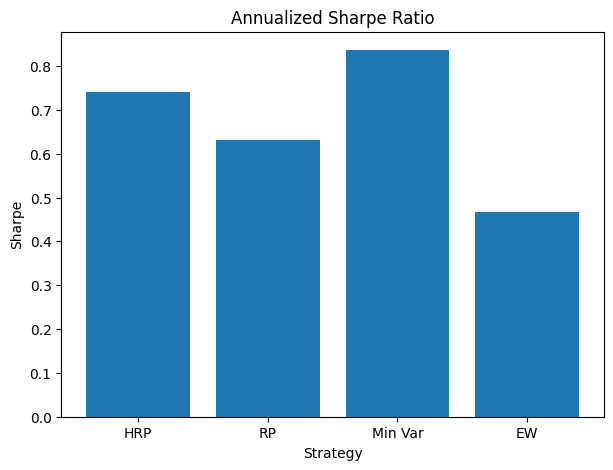

In [22]:
# Plot Sharpe ratios
plot_bar(
    data=sharpe_ratios,
    title='Annualized Sharpe Ratio',
    xlabel='Strategy',
    ylabel='Sharpe',
    figsize=(7, 5)
)

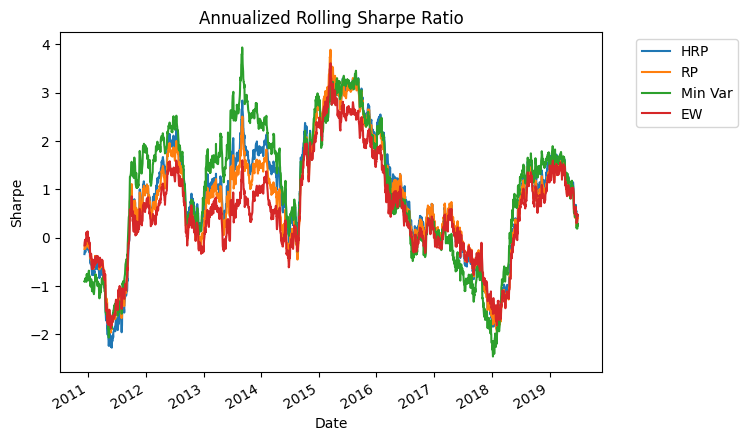

In [23]:
# Plot rolling Sharpe ratios
plot_strategy_comparison(
    data=rolling_sharpe_ratios,
    title='Annualized Rolling Sharpe Ratio',
    xlabel='Date',
    ylabel='Sharpe',
    figsize=(7, 5)
)


# VaR

Value at Risk (VaR) is *an estimate, with a given degree of confidence, of how much can be lost from a portfolio over a given time horizon.*

There are 3 primary ways of calculating VaR for a given confidence *c* (*c* is normally 0.95 higher)

**Historical Method**: 
* Look at daily returns history. Order from worst to best (this gives us a distribution of historical daily returns). 
* Take the *(1 - c)*th percentile. This value is your daily VaR.
* This tells you there is a probability of *c* that the portfolio will lose no more than VaR in a day (assuming VaR is negative). Equivalentally there is a probability of *(1 - c)* that the portfolio will lose more than VaR in a day.
* Alternatively, you can calculate Conditional Value at Risk (CVaR) by looking at *all* daily returns in the *(1 - c)*th percentile and taking their mean. This method takes into account the left tail more than regular VaR and is a better measure of downside risk.
* To adjust to monthly VaR or yearly VaR, multiply by the square root of the time multiple (e.g. sqrt(252) for yearly)

**Normal Distribution**

In [24]:
def calculate_strategy_var_historical_method(
    strategy_returns: pd.Series,
    confidence: float,
    time_horizon=252,
    show_distribution=False,
    strategy_name=''
) -> dict:
    """
     Function to calculate the VaR of a strategy using the historical returns method
    
    PARAMS: 
    'strategy_returns': Series with daily returns of a strategy (output of calculate_strategy_returns())
    'confidence': Confidence level to use in VaR calculation.
    'time_horizon': The time horizon to calculate VaR for (as well as daily VaR). (e.g. if 1, then daily, if 252 then yearly)
    'conditional': Whether to calculate CVaR rather than VaR
    'show_distribution': Whether to plot the distribution of historical daily returns highlighting daily VaR
    'strategy_name': Name of the strategy to be used in title of distribution plot
    """
    
    # Get (1 - confidence) percentile (this is daily VaR)
    daily_var = strategy_returns.quantile(
        q=1-confidence,
        interpolation='linear'
    )
    
    # Calculate CVaR
    daily_cvar = strategy_returns[strategy_returns <= daily_var].mean()
    
    # Adjust VaR for time horizon
    var = daily_var * np.sqrt(time_horizon)
    cvar = daily_cvar * np.sqrt(time_horizon)
    
    # Plot distribution of historical daily returns
    if show_distribution:
        # Plot distribution of returns
        sns.kdeplot(
            data=strategy_returns, 
        )
        
        # Plot daily VaR
        plt.axvline(x=daily_var, color='r', linestyle='--')
        plt.text(x=daily_var, y=-0.5, s='Daily VaR', color='r', ha='center', va='top', rotation=90)
        
        # Plot daily CVaR
        plt.axvline(x=daily_cvar, color='b', linestyle='--')
        plt.text(x=daily_cvar, y=-0.5, s='Daily CVaR', color='b', ha='center', va='top', rotation=90)
        
        # Labels and title
        plt.xlabel('Daily Return')
        plt.title(f"{strategy_name} Daily Returns and VaR")
        plt.show()
    
    # Return VaR and CVaR and time-adjutments in dictionary
    output = {
        'Daily VaR': daily_var,
        'Daily CVaR': daily_cvar,
        f'{time_horizon}-day VaR': var,
        f'{time_horizon}-day CVaR': cvar
    }
    
    return output

In [25]:
# Get VaR for various strategies
confidence = 0.95
time_horizon = 252
equal_weight_var = calculate_strategy_var_historical_method(
    strategy_returns=equal_weight_returns,
    confidence=confidence, 
    time_horizon=time_horizon,
    show_distribution=False,
    strategy_name='EW'
)
min_variance_var = calculate_strategy_var_historical_method(
    strategy_returns=min_variance_returns,
    confidence=confidence, 
    time_horizon=time_horizon,
    show_distribution=False,
    strategy_name='Min Var'
)
risk_parity_var = calculate_strategy_var_historical_method(
    strategy_returns=risk_parity_returns,
    confidence=confidence, 
    time_horizon=time_horizon,
    show_distribution=False,
    strategy_name='RP'
)
hrp_var = calculate_strategy_var_historical_method(
    strategy_returns=hrp_returns,
    confidence=confidence, 
    time_horizon=time_horizon,
    show_distribution=False,
    strategy_name='HRP'
)

In [26]:
# Create dictionary with daily VaRs for all strategies
daily_vars = {
    'HRP': hrp_var['Daily VaR'],
    'RP': risk_parity_var['Daily VaR'],
    'Min Var': min_variance_var['Daily VaR'],
    'EW': equal_weight_var['Daily VaR']
}

# Create dictionary with annual VaRs for all strategies
annual_vars = {
    'HRP': hrp_var['252-day VaR'],
    'RP': risk_parity_var['252-day VaR'],
    'Min Var': min_variance_var['252-day VaR'],
    'EW': equal_weight_var['252-day VaR']
}

# Create dictionary with daily CVaRs for all strategies
daily_cvars = {
    'HRP': hrp_var['Daily CVaR'],
    'RP': risk_parity_var['Daily CVaR'],
    'Min Var': min_variance_var['Daily CVaR'],
    'EW': equal_weight_var['Daily CVaR']
}

# Create dictionary with annual CVaRs for all strategies
annual_cvars = {
    'HRP': hrp_var['252-day CVaR'],
    'RP': risk_parity_var['252-day CVaR'],
    'Min Var': min_variance_var['252-day CVaR'],
    'EW': equal_weight_var['252-day CVaR']
}


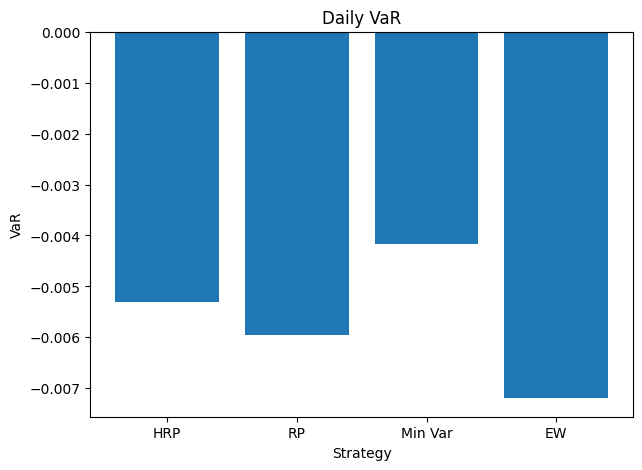

In [27]:
# Plot daily VaRs
plot_bar(
    data=daily_vars,
    title='Daily VaR',
    xlabel='Strategy',
    ylabel='VaR',
    figsize=(7, 5)
)

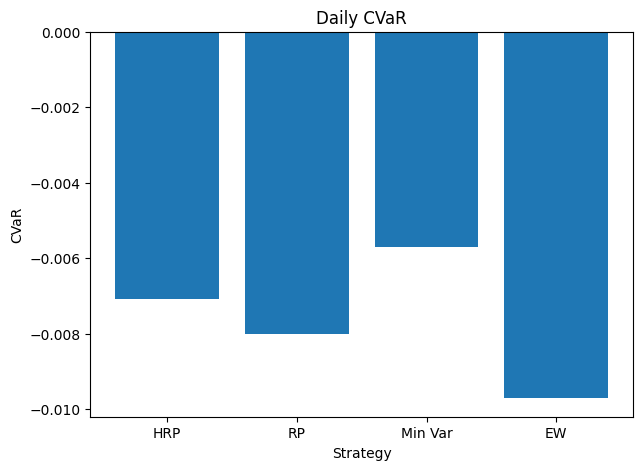

In [28]:
# Plot daily CVaRs
plot_bar(
    data=daily_cvars,
    title='Daily CVaR',
    xlabel='Strategy',
    ylabel='CVaR',
    figsize=(7, 5)
)

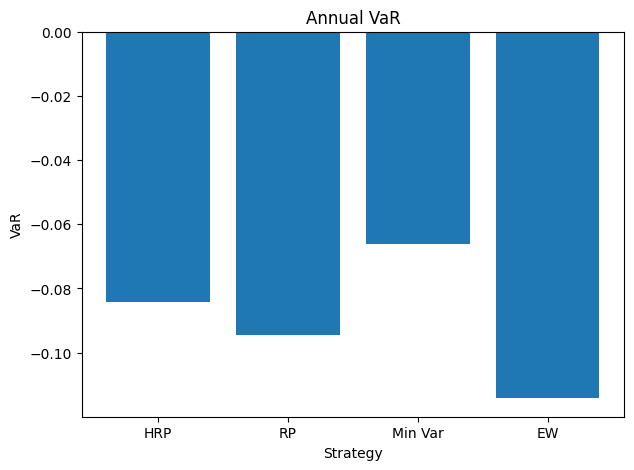

In [29]:
# Plot annual VaRs
plot_bar(
    data=annual_vars,
    title='Annual VaR',
    xlabel='Strategy',
    ylabel='VaR',
    figsize=(7, 5)
)

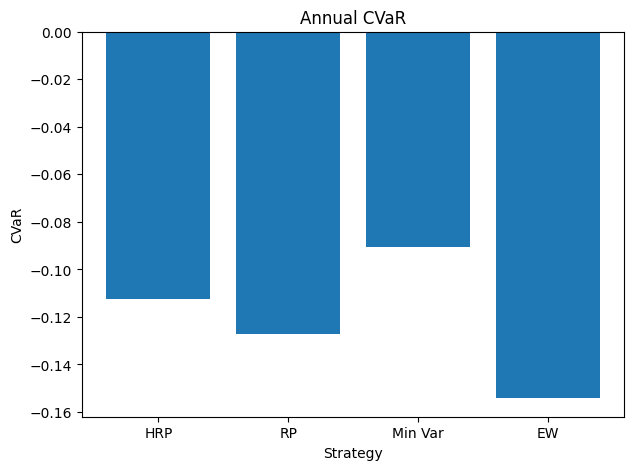

In [30]:
# Plot annual CVaRs
plot_bar(
    data=annual_cvars,
    title='Annual CVaR',
    xlabel='Strategy',
    ylabel='CVaR',
    figsize=(7, 5)
)

# Drawdowns

In [31]:
def calculate_strategy_drawdowns(
    strategy_cumulative_returns: pd.Series,
) -> None:
    """
    Function to calculate drawdown (percentage that the current value is below the running maximum value)
    
    PARAMS: 
    'strategy_cumulative_rerturns': Series with cumulative returns of a strategy (output of calculate_strategy_cumulative_returns())
    """
    
    # Calculate the running maximum of the cumulative returns (biggest value to date)
    running_max = strategy_cumulative_returns.cummax()
    
    # Calculate difference between current value and current maximum
    diff_to_max = strategy_cumulative_returns - running_max
    
    # Calculate drawdown (difference between current value and current maximum but on a percentage basis)
    drawdown = diff_to_max / running_max
    
    return drawdown

In [32]:
# Get drawdowns for various strategies
equal_weight_drawdowns = calculate_strategy_drawdowns(
    strategy_cumulative_returns=equal_weight_cumulative_returns
)
min_variance_drawdowns = calculate_strategy_drawdowns(
    strategy_cumulative_returns=min_variance_cumulative_returns
)
risk_parity_drawdowns = calculate_strategy_drawdowns(
    strategy_cumulative_returns=risk_parity_cumulative_returns
)
hrp_drawdowns = calculate_strategy_drawdowns(
    strategy_cumulative_returns=hrp_cumulative_returns
)

In [33]:
# Create dictionary with drawdowns for all strategies
drawdowns = {
    'HRP': hrp_drawdowns,
    'RP': risk_parity_drawdowns,
    'Min Var': min_variance_drawdowns,
    'EW': equal_weight_drawdowns
}

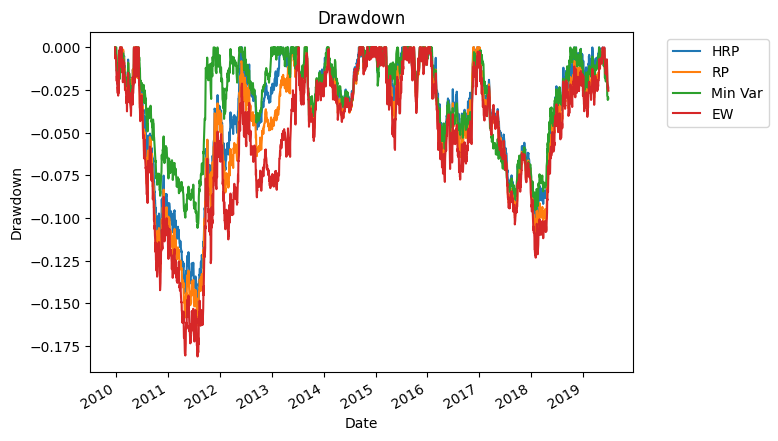

In [34]:
# Plot drawdowns
plot_strategy_comparison(
    data=drawdowns,
    title='Drawdown',
    xlabel='Date',
    ylabel='Drawdown',
    figsize=(7, 5)
)